In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
## Converting the date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [7]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [10]:
# Number of customers per region
customers_per_region = customers['Region'].value_counts()

In [11]:
# Total sales per product category
sales_per_category = merged_data.groupby('Category')['TotalValue'].sum()

In [12]:
# Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

In [13]:
# Average transaction value per customer
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean()

In [14]:
# Top 5 products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(5)

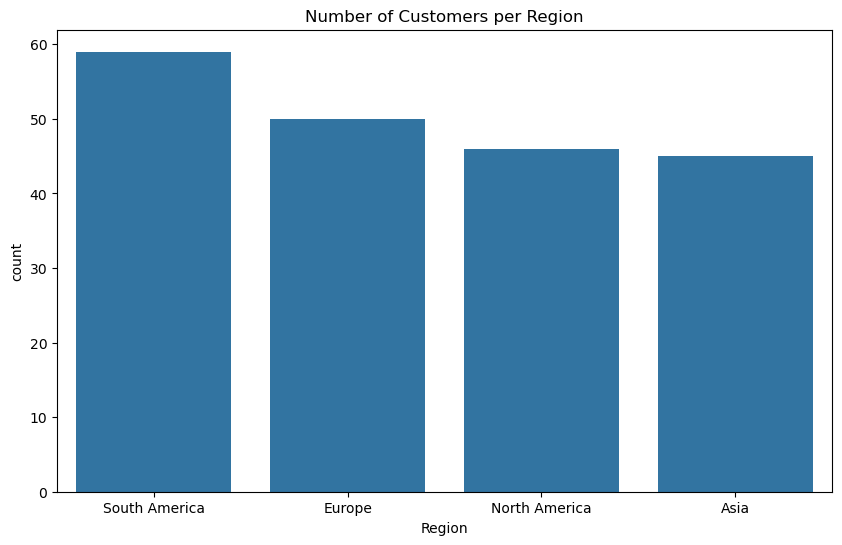

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers_per_region.index)
plt.title('Number of Customers per Region')
plt.show()

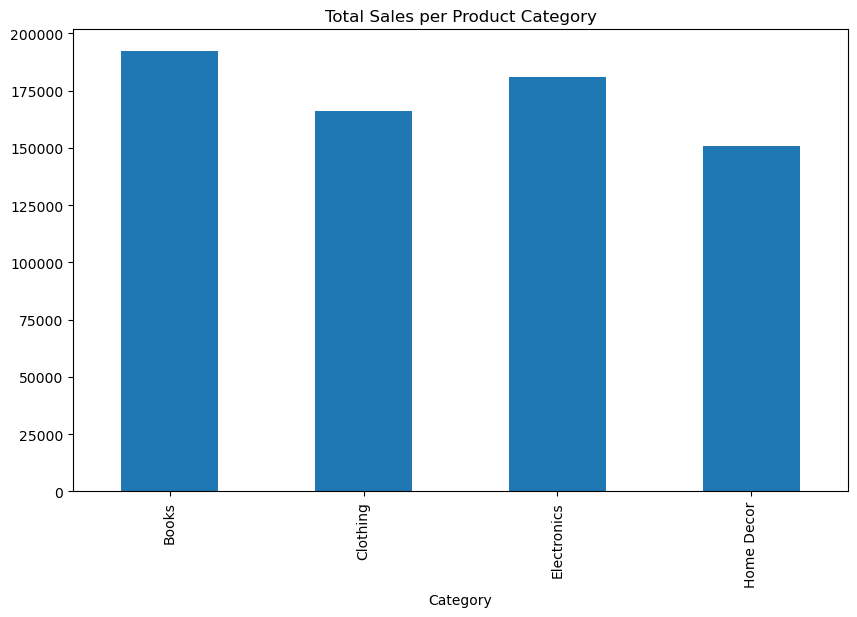

In [16]:
plt.figure(figsize=(10, 6))
sales_per_category.plot(kind='bar')
plt.title('Total Sales per Product Category')
plt.show()

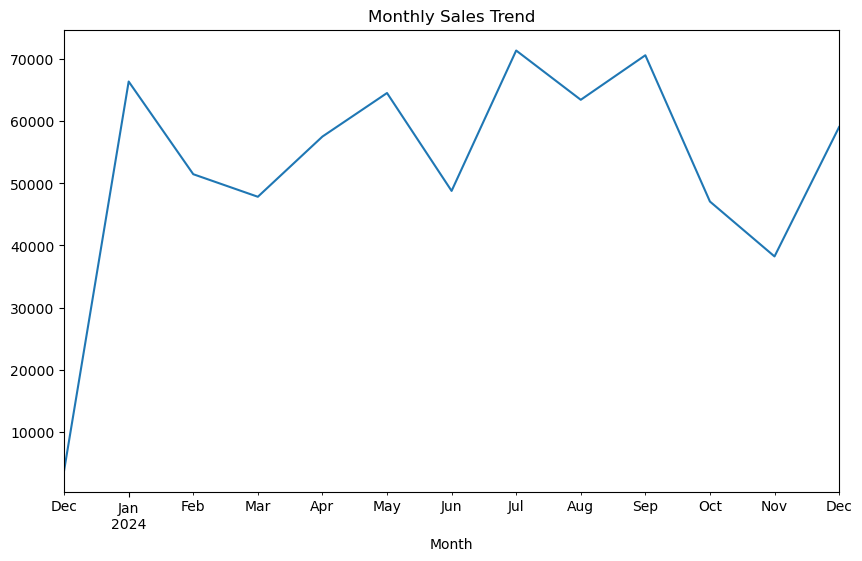

In [17]:
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()

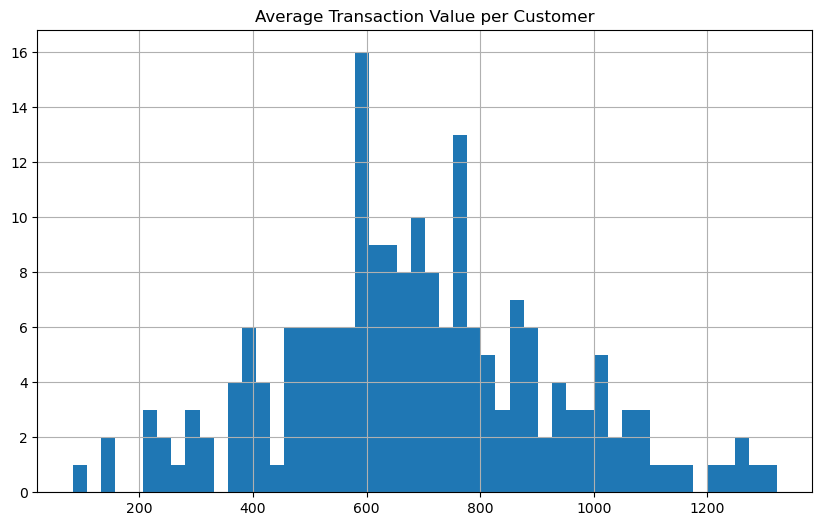

In [18]:
plt.figure(figsize=(10, 6))
avg_transaction_value.hist(bins=50)
plt.title('Average Transaction Value per Customer')
plt.show()

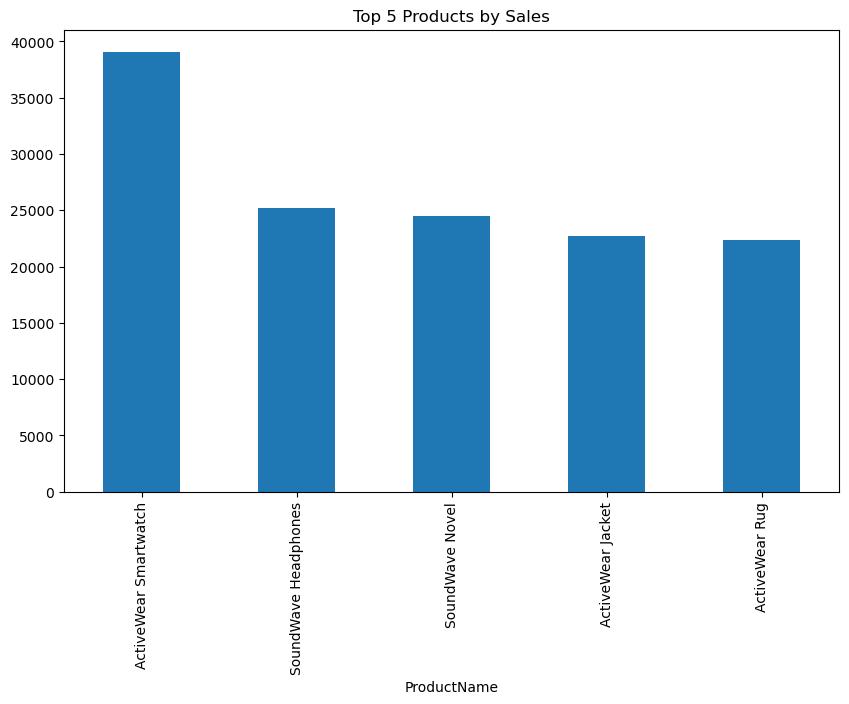

In [19]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 5 Products by Sales')
plt.show()